In [1]:
#importing libraries  

from qiskit import QuantumCircuit 
from qiskit import transpile
from qiskit_aer import AerSimulator

from qiskit_ibm_runtime import SamplerV2
from qiskit_ibm_runtime import QiskitRuntimeService
#from qiskit.circuit.library import MCMT
from qiskit.visualization import plot_distribution
from qiskit.circuit.library import Diagonal

#import numpy as np



In [2]:
#Defining backend and sampler

backend_aer = AerSimulator()
sampler_aer = SamplerV2(backend_aer)

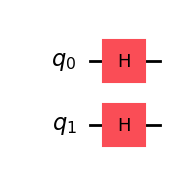

In [3]:
#initializing  quantum circuit
qc = QuantumCircuit(2)   #N = 2 qubits. N=2 classical bits

#Lets put the two qubits in superposition.

#Note that the diagonal-gate is usefull only if the qubits are in superposition

qc.h(0)

qc.h(1)

qc.draw("mpl")

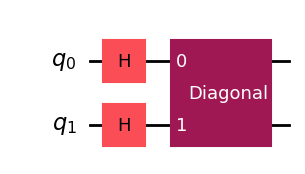

In [4]:
#Lets add the diagonal circuit

qc = qc.compose(Diagonal([-1, 1, 1, -1])) # diagonals = [-1,1,1,-1]
qc.draw("mpl")

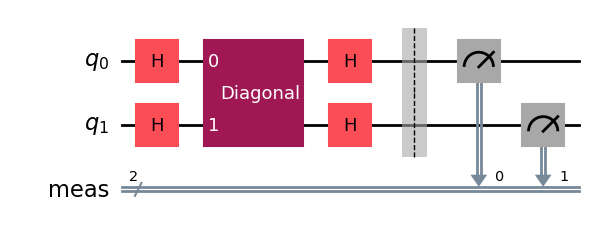

In [5]:
#Now lets take out the qubits from the superposition states. We do this aplly Hadanard again

qc.h(0)

qc.h(1)

#Now we can measure the qubits

qc.measure_all()

qc.draw("mpl")

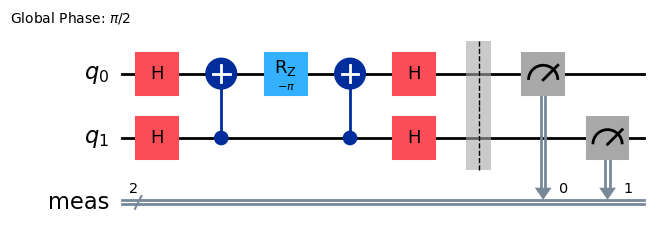

In [6]:
#Transpiling the circuit, it is needed if we want to send to a real QC

qct = transpile(qc,backend = backend_aer) 

#Drawing the trasnpiled circuit
qct.draw("mpl")



#Imprimindo o circuito

#print(circuit)

In [7]:
job_aer = sampler_aer.run([(qct, None, 1000)]) # running the transpiled circuit 1000 times

result = job_aer.result() #Getting the results   

counts = result[0].data.meas.get_counts() #Meassuring results. 
#In this case, measure "meas". See circuit  


#counts
print('RESULT ', counts)

RESULT  {'11': 1000}


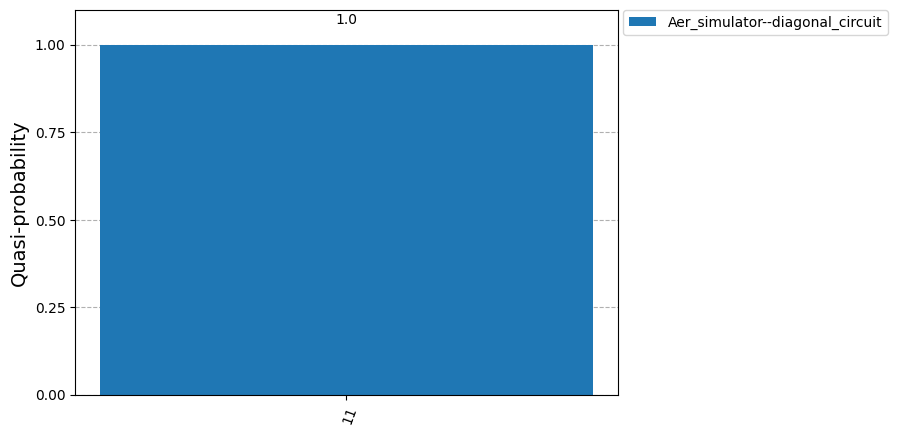

In [8]:
plot_distribution([counts], legend = ['Aer_simulator--diagonal_circuit'])